# Tugas Minggu 3 Visualisasi Data dan Informasi
Nama : M. Deriansyah Okutra\
NIM : 122450101\
Kelas : RB

**Data yang digunakan**

Disini saya menggunakan data penjualan dengan 4 atribut yaitu bulan,barang,penjualan ,dan pendapatan.

**Tujuan**

Untuk menganalisis tren penjualan dan pendapatan berdasarkan bulan dan barang. Visualisasi ini bertujuan untuk memberikan wawasan tentang performa produk dari waktu ke waktu, serta membantu dalam pengambilan keputusan dan strategi pemasaran.


**User**

Manajer Penjualan dan Pemasaran: informasi ini untuk merencanakan strategi pemasaran.\
Analisis Bisnis: Untuk menilai kinerja produk dan menentukan produk mana yang paling laris.\
Eksekutif Perusahaan: Untuk memahami pendapatan perusahaan secara keseluruhan dan membuat keputusan investasi.

**Fungsi**

Membandingkan Penjualan Produk: Memudahkan kita melihat produk mana yang lebih banyak terjual di bulan-bulan tertentu.\
Melihat Tren Penjualan: Membantu kita mengetahui apakah penjualan meningkat atau menurun selama beberapa bulan.\
Menilai Strategi Pemasaran: Kita bisa melihat apakah promosi tertentu berdampak pada penjualan.

**Tone**

Profesional dan Informatif: Menyampaikan data secara jelas dan ringkas, dengan penekanan pada detail yang relevan dan informasi yang dapat diambil untuk keputusan bisnis.\
Edukasi: Memberikan konteks kepada pengguna tentang bagaimana membaca dan memahami visualisasi untuk pengambilan keputusan yang lebih baik.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Simulasi data penjualan bulanan untuk beberapa produk
Bulan = pd.date_range(start='2022-01-01', periods=12, freq='M')
Barang = ['Kursi', 'Meja', 'Lemari', 'Pintu']

# Membuat dataframe simulasi
data_penjualan = pd.DataFrame({
    'Bulan': np.tile(Bulan, len(Barang)),
    'Barang': np.repeat(Barang, len(Bulan)),
    'Penjualan': np.random.randint(10,80 , size=len(Barang) * len(Bulan)),
})
# Menentukan harga per unit untuk setiap barang
harga_per_barang = {
    'Kursi': 300000,
    'Meja': 650000,
    'Lemari': 1000000,
    'Pintu': 780000
}

# Menambahkan kolom pendapatan berdasarkan barang dan penjualan
data_penjualan['Pendapatan'] = data_penjualan.apply(lambda row: row['Penjualan'] * harga_per_barang[row['Barang']], axis=1)

# Menampilkan hasil
df = pd.DataFrame(data_penjualan)
df.sample(n=10)

,Bulan,Barang,Penjualan,Pendapatan
30,2022-07-31,Lemari,51,51000000
34,2022-11-30,Lemari,60,60000000
46,2022-11-30,Pintu,66,51480000
41,2022-06-30,Pintu,71,55380000
1,2022-02-28,Kursi,68,20400000
44,2022-09-30,Pintu,57,44460000
17,2022-06-30,Meja,10,6500000
45,2022-10-31,Pintu,74,57720000
9,2022-10-31,Kursi,26,7800000
24,2022-01-31,Lemari,20,20000000


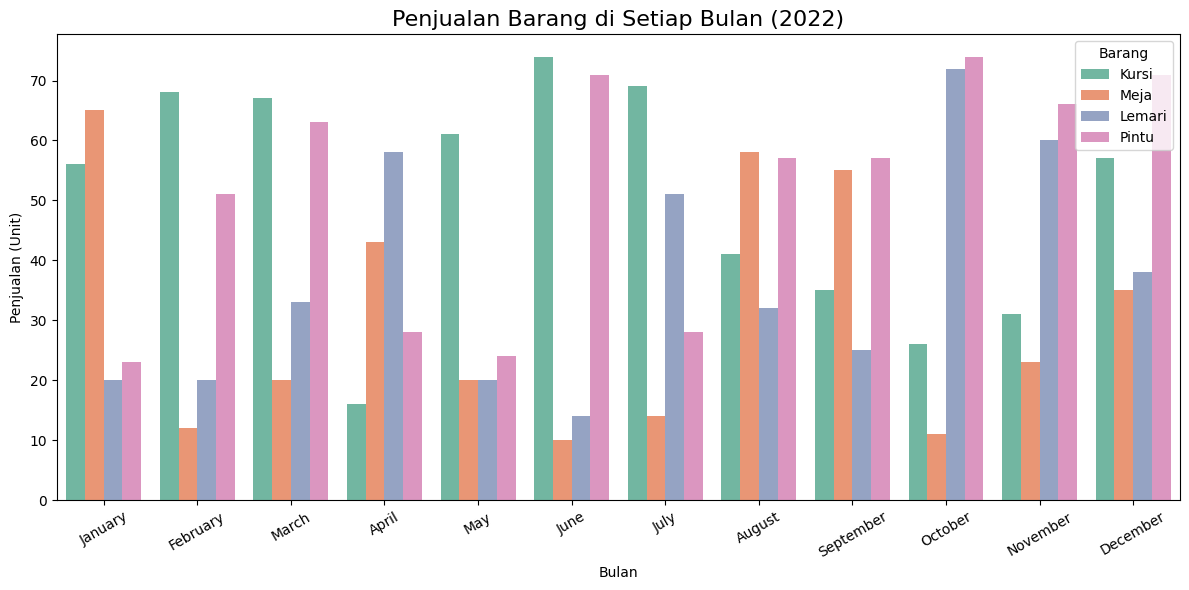

In [14]:
# Menambahkan kolom pendapatan berdasarkan penjualan dan harga barang
data_penjualan['Pendapatan'] = data_penjualan.apply(lambda row: row['Penjualan'] * harga_per_barang[row['Barang']], axis=1)

# Membuat barplot untuk menampilkan penjualan barang di setiap bulan
plt.figure(figsize=(12, 6))
sns.barplot(x=data_penjualan['Bulan'].dt.strftime('%B'), y='Penjualan', hue='Barang', data=df, palette='Set2')
plt.xticks(rotation=30)
plt.title('Penjualan Barang di Setiap Bulan (2022)', fontsize=16)
plt.xlabel('Bulan', fontsize=10)
plt.ylabel('Penjualan (Unit)', fontsize=10)
plt.legend(title='Barang')
plt.tight_layout()
plt.show()

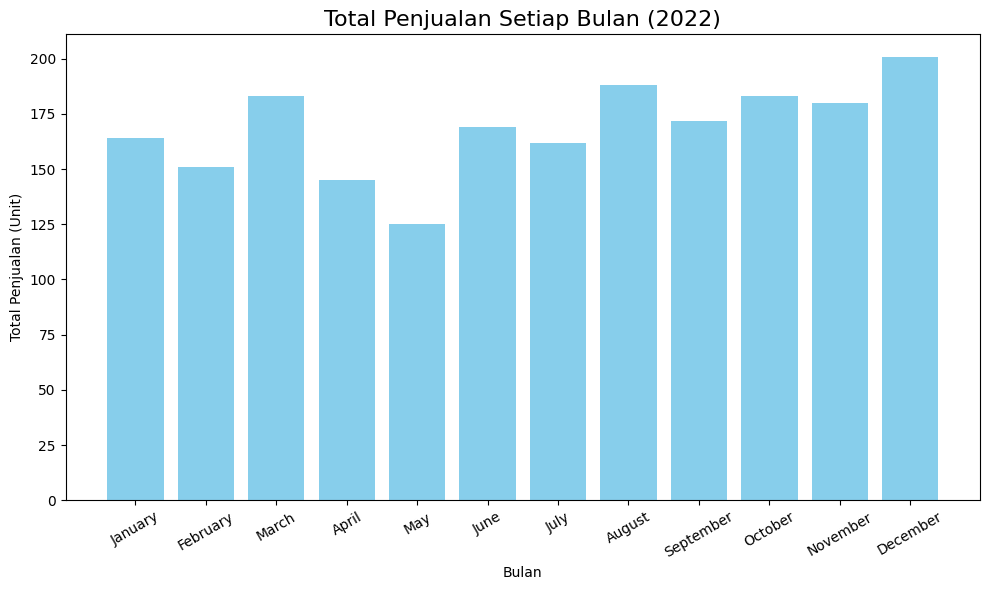

In [15]:
# Mengelompokkan data berdasarkan bulan dan menghitung total penjualan
total_penjualan_bulanan = df.groupby('Bulan')['Penjualan'].sum().reset_index()

# Membuat visualisasi bar plot untuk total penjualan setiap bulan
plt.figure(figsize=(10, 6))
plt.bar(total_penjualan_bulanan['Bulan'].dt.strftime('%B'), total_penjualan_bulanan['Penjualan'], color='skyblue')
plt.xticks(rotation=30)
plt.title('Total Penjualan Setiap Bulan (2022)', fontsize=16)
plt.xlabel('Bulan', fontsize=10)
plt.ylabel('Total Penjualan (Unit)', fontsize=10)
plt.tight_layout()
plt.show()

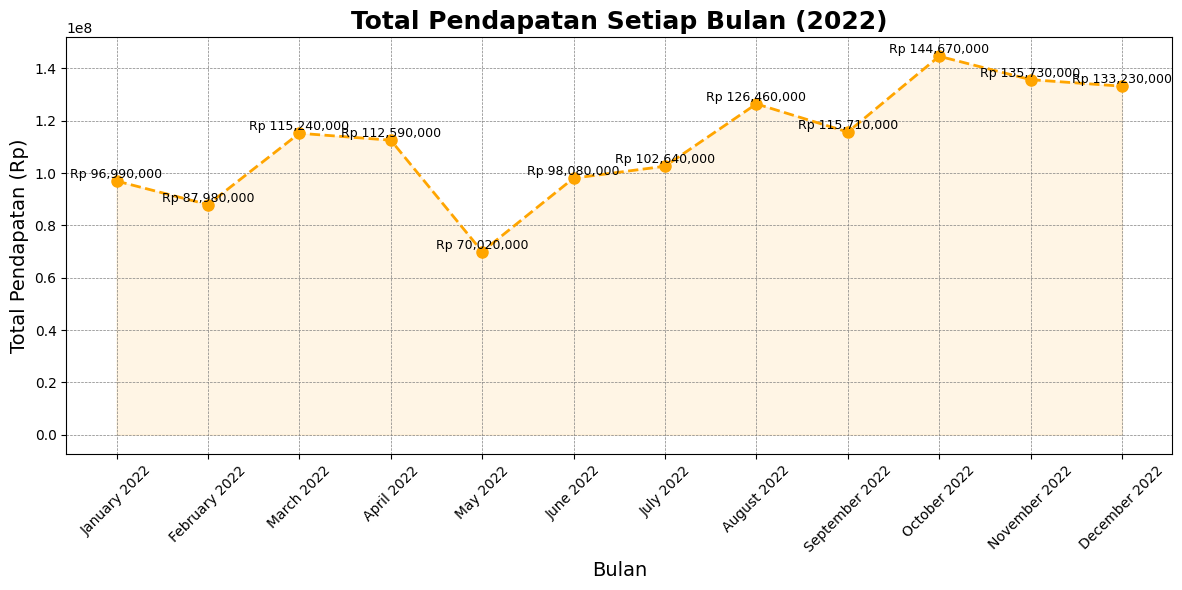

In [16]:
# Menghitung pendapatan
df['Pendapatan'] = df.apply(lambda row: row['Penjualan'] * harga_per_barang[row['Barang']], axis=1)

# Mengelompokkan data berdasarkan bulan dan menghitung total pendapatan
total_pendapatan_bulanan = df.groupby('Bulan')['Pendapatan'].sum().reset_index()

# Mengurutkan bulan sesuai dengan urutan
total_pendapatan_bulanan['Bulan'] = total_pendapatan_bulanan['Bulan'].dt.strftime('%B %Y')

# Membuat visualisasi line plot untuk total pendapatan setiap bulan
plt.figure(figsize=(12, 6))
plt.plot(total_pendapatan_bulanan['Bulan'], total_pendapatan_bulanan['Pendapatan'],
         marker='o', markersize=8, color='orange', linewidth=2, linestyle='--')

# Mengisi area di bawah garis
plt.fill_between(total_pendapatan_bulanan['Bulan'], total_pendapatan_bulanan['Pendapatan'],
                 color='orange', alpha=0.1)

# Menambahkan anotasi untuk setiap titik
for i, value in enumerate(total_pendapatan_bulanan['Pendapatan']):
    plt.text(total_pendapatan_bulanan['Bulan'][i], value, f'Rp {value:,.0f}',
             fontsize=9, ha='center', va='bottom')

# Mengatur tampilan sumbu dan judul
plt.xticks(rotation=45)
plt.title('Total Pendapatan Setiap Bulan (2022)', fontsize=18, fontweight='bold')
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Total Pendapatan (Rp)', fontsize=14)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Menampilkan plot
plt.show()